TMM Notebook to explain how to obtain the different functions that may be needed to study a planar microcavity

Created on Fall 2024 in UAM

@author on: Adolfo Menendez


# Explanation of the code with examples 

Initially we import the packages that are going to be used

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate as interpid
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_widths


: 

## Structure

The structure has to be made using the refraction index of the materials of the DBR. 

To start the simulation the first step would be to interpolate this functions n($\lambda$) and k($\lambda$) from a database. Our data is in the $\bf{data\_nk}$ folder

In [2]:
# Import data reflexiv index for lambda from 0.3 to 1 um

SiO2_df = pd.read_csv('data_nk/SiO2 - thin film 2016.txt', sep='\t')
TiO2_df = pd.read_csv('data_nk/TiO2.txt', sep='\t')

# Correction for n_air
def n_air(lambda_cav):
    return 1 + 0.05792105/(238.0185 - lambda_cav**-2) + 0.00167917/(57.362 - lambda_cav**-2)

# Interpolation functions
def function_n_SiO2(lambda_cav):
    f = interpid.interp1d(SiO2_df['lambda'], SiO2_df['n'], kind='linear')
    return f(lambda_cav)
def function_k_SiO2(lambda_cav):
    f = interpid.interp1d(SiO2_df['lambda'], SiO2_df['k'], kind='linear')
    return f(lambda_cav)
def function_n_TiO2(lambda_cav):
    f = interpid.interp1d(TiO2_df['lambda'], TiO2_df['n'], kind='linear')
    return f(lambda_cav)
def function_k_TiO2(lambda_cav):
    f = interpid.interp1d(TiO2_df['lambda'], TiO2_df['k'], kind='linear')
    return f(lambda_cav)

# See the plots at data_nk folder

The next step would be defining the different layers. Some of them are:

In [3]:
def SiO2TiO2BM(lambda_cav, lambda_, Npairs):
    """
    Layer of SiO2 with TiO2 between them

    lambda_cav: central wavelength
    lambda_: incident wavelength
    Npairs: number of pairs of layers
    """
    delta_SiO2 = lambda_cav / (4 * function_n_SiO2(lambda_cav))
    delta_TiO2 = lambda_cav / (4 * function_n_TiO2(lambda_cav))
    n_SiO2 = function_n_SiO2(lambda_)
    n_TiO2 = function_n_TiO2(lambda_)
    k_SiO2 = function_k_SiO2(lambda_)
    k_TiO2 = function_k_TiO2(lambda_)

    # Generate the layer structure
    layers = []
    for i in range(Npairs):
        layers.append([delta_SiO2, n_SiO2 + 1j * k_SiO2])
        layers.append([delta_TiO2, n_TiO2 + 1j * k_TiO2])
    return layers

def TiO2SiO2BM(lambda_cav, lambda_, Npairs):
    """
    Layer of TiO2 with SiO2 between them

    lambda_cav: central wavelength
    lambda_: incident wavelength
    Npairs: number of pairs of layers
    """
    delta_SiO2 = lambda_cav / (4 * function_n_SiO2(lambda_cav))
    delta_TiO2 = lambda_cav / (4 * function_n_TiO2(lambda_cav))
    n_SiO2 = function_n_SiO2(lambda_)
    n_TiO2 = function_n_TiO2(lambda_)
    k_SiO2 = function_k_SiO2(lambda_)
    k_TiO2 = function_k_TiO2(lambda_)

    # Generate the layer structure
    layers = []
    for i in range(Npairs):
        layers.append([delta_TiO2, n_TiO2 + 1j * k_TiO2])
        layers.append([delta_SiO2, n_SiO2 + 1j * k_SiO2])
    return layers

def CavSpacer(lambda_cav, lambda_0, Lcav):
    # Layer of air
    return [[Lcav*lambda_cav/n_air(lambda_cav) ,n_air(lambda_0)]]

def SiO2layer(lambda_, delta_):
    """
    Layer of SiO2
    """
    return [[delta_, function_n_SiO2(lambda_) + 1j* function_k_SiO2(lambda_)]]

def profilerSiO2TiO2BM(lambda_0, lambda_, Npairs,samples):
    """
    lambda_0: central wavelength
    lambda_: wavelength range
    Npairs: number of pairs of layers
    samples_: number of samples of the spectrum
    """
    # Layer of SiO2 with TiO2 between them
    delta_SiO2 = lambda_0 / (4 * samples * function_n_SiO2(lambda_0))
    delta_TiO2 = lambda_0 / (4 * samples * function_n_TiO2(lambda_0))
    n_SiO2 = function_n_SiO2(lambda_0)
    n_TiO2 = function_n_TiO2(lambda_0)
    k_SiO2 = function_k_SiO2(lambda_0)
    k_TiO2 = function_k_TiO2(lambda_0)

    # Generate the layer structure
    layer_1 = [[delta_SiO2, n_SiO2 + 1j* k_SiO2] for i in range(samples)]
    layer_2 = [[delta_TiO2, n_TiO2 + 1j* k_TiO2] for i in range(samples)]
    structure = []
    for i in range(Npairs):
        structure.extend(layer_1)
        structure.extend(layer_2)
    return structure

def profilerTiO2SiO2BM(lambda_0, lambda_, Npairs,samples):
    """
    lambda_0: central wavelength
    lambda_: wavelength range
    Npairs: number of pairs of layers
    samples_: number of samples of the spectrum
    """
    # Layer of TiO2 with SiO2 between them
    delta_SiO2 = lambda_0 / (4 * samples * function_n_SiO2(lambda_0))
    delta_TiO2 = lambda_0 / (4 * samples * function_n_TiO2(lambda_0))
    n_SiO2 = function_n_SiO2(lambda_0)
    n_TiO2 = function_n_TiO2(lambda_0)
    k_SiO2 = function_k_SiO2(lambda_0)
    k_TiO2 = function_k_TiO2(lambda_0)

    # Generate the layer structure
    layer_1 = [[delta_SiO2, n_SiO2 + 1j* k_SiO2] for i in range(samples)]
    layer_2 = [[delta_TiO2, n_TiO2 + 1j* k_TiO2] for i in range(samples)]
    structure = []
    for i in range(Npairs):
        structure.extend(layer_2)
        structure.extend(layer_1)
    return structure

def profilerCavSpacer(lambda_0, lambda_, Ncav, samples):
    # Layer of air
    return [[Ncav*lambda_0/(samples*n_air(lambda_0)) ,n_air(lambda_)] for i in range(samples)]

### Example 1 Structure

We can see how our structure looks like before the TMM simulations.

/home/adolfo/.pyenv/versions/lewagon/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/adolfo/.pyenv/versions/lewagon/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1588: ComplexWarning: Casting complex values to real discards the imaginary part
  steps[0, 0::2] = x


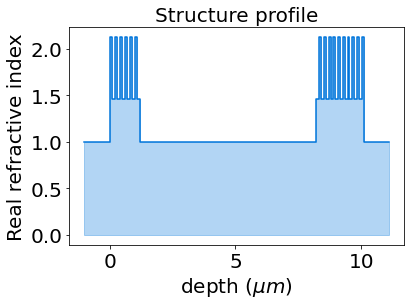

In [4]:
# Define the variables:

N_top = 6
N_bot = 10
Lcav = 7.0/0.65
lambda_cav = 0.65


#################################################################################################
# Creating the DBR

structure = np.array(
                    TiO2SiO2BM(lambda_cav+0.05, lambda_cav, N_top) +
                    CavSpacer(lambda_cav, lambda_cav, Lcav) +
                    SiO2TiO2BM(lambda_cav, lambda_cav, N_bot)
                    )


# Rewrite and separate the structure profile to plot it
depth_tab = np.insert(np.cumsum(structure[:, 0]), 0, 0)
n_struct = []
for i in range(len(structure)):
    n_real = structure[i, 1].real
    n_struct.append([depth_tab[i], n_real])

# Add boundary points to n_struct
n_struct = [[-1, 1], [0, 1]] + n_struct + [[depth_tab[-1], 1], [depth_tab[-1] + 1, 1]]

# Extract depth and refractive index values
depth = [point[0] for point in n_struct]
refractive_index = [point[1] for point in n_struct]

# Create the plot
plt.figure()

# Plotting the data
plt.step(depth, refractive_index, where='post', color=(0, 0.46, 0.86), label='Refractive index')
# Filling under the plot
plt.fill_between(depth, refractive_index, step='post', color=(0, 0.46, 0.86), alpha=0.3)

#Customize the plot
plt.xlabel(r'depth ($\mu m$)', fontsize = 20)
plt.ylabel('Real refractive index', fontsize = 20)
plt.title('Structure profile', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)


## Auxiliary functions for the TMM

This are the functions that will be used in the main calculations.

In [5]:
def snellCalculator(nlist, theta_in):
    """
    Calculate the angle list using Snell's law.

    Parameters:
    n_list (np.array): Array of refractive indices.
    theta_in (float): Incident angle in radians.

    Returns:
    np.array: Array of angles.
    """

    return np.arcsin( np.sin(theta_in) / nlist)

def interfaceR(pol, ni, nf, thi, thf):
    """
    Calculate the reflection coefficient at an interface between two media for given polarization.

    Parameters:
    pol (int): Polarization state (1 for parallel, 0 for perpendicular).
    ni (float): Refractive index of the initial medium.
    nf (float): Refractive index of the final medium.
    thi (float): Incident angle in radians.
    thf (float): Refraction angle in radians.

    Returns:
    float: The reflection coefficient.
    """
    if pol == 1:
        # Parallel polarization
        return (ni * np.cos(thi) - nf * np.cos(thf)) / (ni * np.cos(thi) + nf * np.cos(thf))
    else:
        # Perpendicular polarization
        return (nf * np.cos(thi) - ni * np.cos(thf)) / (nf * np.cos(thi) + ni * np.cos(thf))

def interfaceT(pol, ni, nf, thi, thf):
    """
    Calculate the transmission coefficient at an interface between two media for given polarization.

    Parameters:
    pol (int): Polarization state (1 for parallel, 0 for perpendicular).
    ni (float): Refractive index of the initial medium.
    nf (float): Refractive index of the final medium.
    thi (float): Incident angle in radians.
    thf (float): Refraction angle in radians.

    Returns:
    float: The transmission coefficient.
    """
    if pol == 1:
        # Parallel polarization
        return 2 * ni * np.cos(thi) / (ni * np.cos(thi) + nf * np.cos(thf))
    else:
        # Perpendicular polarization
        return 2 * ni * np.cos(thi) / (nf * np.cos(thi) + ni * np.cos(thf))

def TrM(delta,r,t):
    """
    Calculate the transfer matrix for one step

    Parameters:
    delta (float) : width of the step.
    r (float): Reflection coeficient.
    t (float) : Transmission coeficient.

    Returns:
    array: The transfer matrix.
    """
    return 1/t * np.array([[np.exp(-1j * delta), np.exp(-1j * delta)*r],
                               [r * np.exp(1j * delta), np.exp(1j * delta)]])

def structure(lambda_cav,lambda_0,N_top,N_bot,Lcav):
    return np.array(
                            SiO2TiO2BM(lambda_cav+0.001, lambda_0, N_top) +
                            CavSpacer(lambda_cav, lambda_0, Lcav) +
                            TiO2SiO2BM(lambda_cav, lambda_0, N_bot)
                            )

## Coherent TMM main function

In [6]:
def CohTMM(pol, theta_in, lambda_0, lambda_cav, N_top, N_bot, Lcav):
    """
    Calculate coherent transfer matrix method properties.

    Parameters:
    pol (int): Polarization state (1 for parallel, 0 for perpendicular).
    theta_in (float): Incident angle in radians.
    lambda_0 (float): Incident Wavelength.
    lambda_cav (float): Cavity Wavelength.
    N_top (int): Number of pairs at the top mirror.
    N_bot (int): Number of pairs at the bottom mirror.
    Lcav (float): Length between the mirrors in units of lambda_cav.

    Returns:
    List: Calculated properties [theta_in, lambda_0, Abs(Mtilde[2, 1]/Mtilde[1, 1])^2, Abs(1.0/Mtilde[1, 1])^2, 1239.87 * 0.001 / lambda_0]
    """

    # Define structure
    list_structure = structure(lambda_cav,lambda_0,N_top,N_bot,Lcav)

    n_list = np.concatenate([[1.0], list_structure[:, 1], [1.0]])

    angle_list = snellCalculator(n_list, theta_in)
    kz_list = 2.0 * np.pi * n_list * np.cos(angle_list) / lambda_0
    delta = kz_list[1:-1] * list_structure[:, 0]

    t_list = np.array([interfaceT(pol, n_list[i], n_list[i + 1], angle_list[i], angle_list[i + 1]) for i in range(len(n_list) - 1)])
    r_list = np.array([interfaceR(pol, n_list[i], n_list[i + 1], angle_list[i], angle_list[i + 1]) for i in range(len(n_list) - 1)])

    M_list = [TrM(delta[i-1], r_list[i], t_list[i]) for i in range(1, len(n_list) - 1)]
    M_product = np.linalg.multi_dot(M_list)

    M_tilde = 1.0/t_list[0] * np.dot(np.array([[1.0, r_list[0]], [r_list[0], 1.0]]), M_product)
    # r_final -> M_tilde[1, 0] / M_tilde[0, 0]
    # t_final -> 1.0 / M_tilde[0, 0]

    return [theta_in, lambda_0, np.abs(M_tilde[1, 0] / M_tilde[0, 0])**2, np.abs(1.0 / M_tilde[0, 0])**2, 1239.87 * 0.001 / lambda_0] # (1239.87 * 0.001 lambda to energy conversion)


## Simulation of the reflection and the Quality factor (Q)

In [7]:
def simulate_ref(pol, theta, lambda_cav, delta_lambda, Npoints,N_top, N_bot, Lcav):
    """
    Calculate the reflection of the cavity at different lambda.

    Parameters:
    pol (int): Polarization state (1 for parallel, 0 for perpendicular).
    structure (np.array): Structure of materials as a 2D array.
    theta (float): Incident angle in radians.
    lambda_cav (float): Cavity Wavelength.
    delta_lambda (float): Wavelength range.
    Npoints (int): Number of points.
    N_top (int): Number of pairs at the top mirror.
    N_bot (int): Number of pairs at the bottom mirror.
    Lcav (float): Cavity length.
    plot (bool): Plot the results.

    Returns:
    Dictionary: Calculated properties including wavelengths, energies, and reflectivity.
    """

    wavelengths = np.linspace(lambda_cav-delta_lambda, lambda_cav+delta_lambda, Npoints)
    TMMcalculator = np.array([CohTMM(pol, theta, lambda_, lambda_cav, N_top, N_bot, Lcav) for lambda_ in wavelengths])

    return {
        'wavelengths': TMMcalculator[:, 1],
        'R': TMMcalculator[:, 2],
        'energy': TMMcalculator[:, 4]
    }

def simulateQ(pol, theta, lambda_cav, delta_lambda, Npoints, N_top, N_bot, Lcav, plot=True):
    """
    Calculate the the quality factor of a cavity. Be aware that the peaks function may be considering peaks outside the sideband.

    Parameters:
    pol (int): Polarization state (1 for parallel, 0 for perpendicular).
    theta (float): Incident angle in radians.
    lambda_cav (float): Wavelength.
    delta_lambda (float): Wavelength range.
    Npoints (int): Number of points.
    N_top (int): Number of pairs at the top mirror.
    N_bot (int): Number of pairs at the bottom mirror.
    Lcav (float): Cavity length.
    plot (bool): Plot the results.

    Returns:
    Dictionary: Calculated properties including structure, linewidth, Q factor, and absorption.
    """

    # Simulate the spectrum
    wavelengths = np.linspace(lambda_cav - delta_lambda, lambda_cav + delta_lambda, Npoints)
    TMMcalculator = np.array([CohTMM(pol, theta, lambda_, lambda_cav, N_top, N_bot, Lcav) for lambda_ in wavelengths])

    # Calculate the Q factor
    y = TMMcalculator[:,2]
    valleys, _ = find_peaks(-y)
    half = peak_widths(x=-y,peaks=valleys, rel_height=0.5)[0]
    FWHM = half * (wavelengths[-1]-wavelengths[0])/Npoints
    Q = wavelengths[valleys]/FWHM

    if plot == True:
        # Plot the fit results
        plt.figure(figsize=(10, 6))
        plt.plot(TMMcalculator[:,4], TMMcalculator[:, 2], "b", label='Simulation Data')
        plt.scatter(TMMcalculator[valleys,4], TMMcalculator[valleys,2], color='red', label='peaks')
        plt.xlabel('Energy (eV)', fontsize = 30)
        plt.ylabel(r'R', fontsize = 30)
        plt.tick_params(axis='both', which='major', labelsize=30)
        # plt.legend(fontsize=20)
        plt.show()

    # Output results
    return {
        "Qfact":Q,
        "wavelengths": TMMcalculator[:, 1],
        "R": TMMcalculator[:, 2],
        "energy":TMMcalculator[:,4],
        "lambda_0": wavelengths[valleys],
        "energy_0":TMMcalculator[valleys,4],
        "R_peak": TMMcalculator[:, 2][valleys]
    }


### Example 2: Q factor and Reflectivity of the cavity

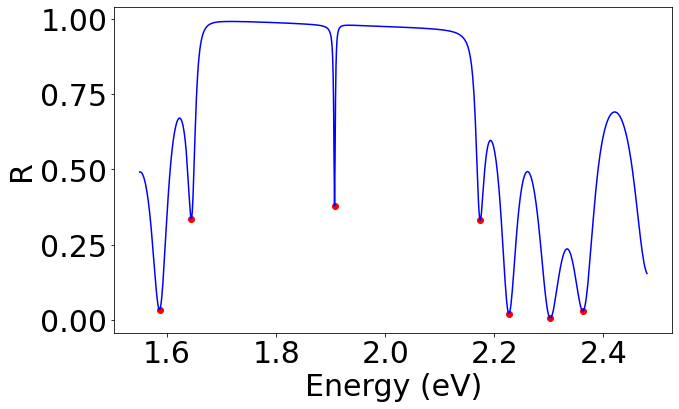

For E = 2.3619949084668193 eV the Q factor is: 104.69878631705052
For E = 2.302714500836587 eV the Q factor is: 22.941942940631026
For E = 2.2269509708737867 eV the Q factor is: 91.90021414304802
For E = 2.174179620853081 eV the Q factor is: 189.22169420733613
For E = 1.907051778290993 eV the Q factor is: 608.9372035610751
For E = 1.6442720430107525 eV the Q factor is: 137.95923626960413
For E = 1.5861571648098347 eV the Q factor is: 65.49205764839921


In [11]:
# Define the variables:
pol = 1
theta = 0
N_top = 6
N_bot = 10
Lcav = 2
lambda_cav = 0.65
delta_lambda = 0.15
Npoints = 1000

sim = simulateQ(pol, theta, lambda_cav, delta_lambda, Npoints, N_top, N_bot, Lcav, plot=True)
for i in range(len(sim["Qfact"])):
    E = sim["energy_0"][i]
    Q = sim["Qfact"][i]
    print(f"For E = {E} eV the Q factor is: {Q}")


## Modesplitting with Lcav (Lenght between the mirrors)

In [9]:
def modesplitting(pol, theta, lambda_cav, delta_lambda, Npoints, N_top, N_bot, Lcav_list):
    """
    Calculate R for different distances of the cavity in units of lambda.

    Parameters:
    pol (int): Polarization state (1 for parallel, 0 for perpendicular).
    theta (float): Incident angle in radians.
    lambda_cav (float): Wavelength.
    delta_lambda (float): Wavelength range.
    Npoints (int): Number of points.
    N_top (int): Number of pairs at the top mirror.
    N_bot (int): Number of pairs at the bottom mirror.
    Lcav_list (list or array): List/array of cavity lengths in units of lambda.

    Returns:
    DataFrame with 3 columns: Energy, Lcav and R
    """

    # Initialize the lists for the loop
    energies = []
    lcavs = []
    Rs = []

    # Loop to simulate and save the results per Lcav
    for Lcav in Lcav_list:
        vector = simulate_ref(pol, theta, lambda_cav, delta_lambda, Npoints, N_top, N_bot, Lcav)
        energies.extend(vector["energy"])
        lcavs.extend([Lcav] * len(vector["energy"]))
        Rs.extend(vector["R"])

    # Create a DataFrame with the data
    df = pd.DataFrame({
        'Energy': energies,
        'Lcav': lcavs,
        'R': Rs
    })

    return df

### Example 3: Reflection as a function of Energy ($\lambda_0$) and lenght between the mirrors (Lcav).

In [10]:
# Define the variables:
pol = 1
theta = 0
N_top = 6
N_bot = 10
Lcav_list = np.linspace(0,2,100)
lambda_cav = 0.650
delta_lambda = 0.1
Npoints = 500

df_sim = modesplitting(pol,theta,lambda_cav,delta_lambda,Npoints,N_top,N_bot,Lcav_list)


# Create a scatter plot with Lcav on x-axis, Energy on y-axis, and R as color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_sim['Lcav'], df_sim['Energy'], c=df_sim['R'], cmap='inferno', s=10)

# Add colorbar
plt.colorbar(scatter, label='R')

# Set labels and title
plt.xlabel(r'Lcav ($\lambda_c$)')
plt.ylabel('Energy')
plt.title('Energy vs Lcav with R as Color Gradient')

plt.show()

KeyboardInterrupt: 

## Variation with the angle ($k_{//}$)

In [ ]:
def disprel(pol, theta_list, lambda_cav, delta_lambda, Npoints, N_top, N_bot, Lcav):
    """
    Calculate R for different angles (k).

    Parameters:
    pol (int): Polarization state (1 for parallel, 0 for perpendicular).
    theta_list (list or array): List/array of incident angles in radians.
    lambda_cav (float): Wavelength.
    delta_lambda (float): Wavelength range.
    Npoints (int): Number of points.
    N_top: Number of pairs at the top mirror.
    N_bot: Number of pairs at the bottom mirror.
    Lcav (float): Cavity length in units of lambda.

    Returns:
    DataFrame with 3 columns: Energy, k//, and R.
    """
    all_results = [
        simulate_ref(pol, theta, lambda_cav, delta_lambda, Npoints, N_top, N_bot, Lcav)
        for theta in theta_list
    ]

    # Combine all results into a single DataFrame
    energies = np.concatenate([result['energy'] for result in all_results])
    ks = np.concatenate([
        np.full(len(result['energy']), 2 * np.pi * np.sin(theta) / lambda_cav)
        for result, theta in zip(all_results, theta_list)
    ])
    Rs = np.concatenate([result['R'] for result in all_results])

    return pd.DataFrame({
        'Energy': energies,
        'k//': ks,
        'R': Rs
    })

### Example 4: Reflection as a function of Energy ($\lambda_0$) and incident angle ($k_{//}$).

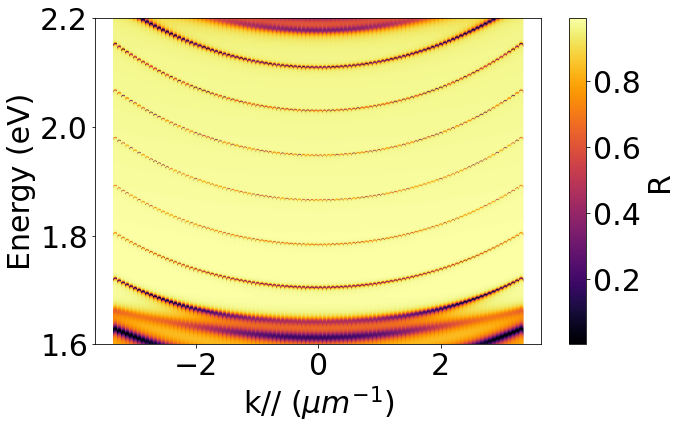

In [ ]:
# Define the variables:
pol = 1
theta_list = np.linspace(-0.35,0.35,100)
N_top = 6
N_bot = 10
Lcav = 7/0.65
lambda_cav = 0.65
delta_lambda = 0.2
Npoints = 1000

df_sim = disprel(pol,theta_list,lambda_cav,delta_lambda,Npoints,N_top,N_bot,Lcav)


# Create a scatter plot with Lcav on x-axis, Energy on y-axis, and R as color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_sim['k//'], df_sim['Energy'], c=df_sim['R'], cmap='inferno', s=10)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("R", fontsize=30)
cbar.ax.tick_params(labelsize=30)

# Set labels and title
plt.xlabel(r'k// ($\mu m^{-1}$)', fontsize=30)
plt.ylabel('Energy (eV)', fontsize=30)
# plt.title('Energy vs k// with R as Color Gradient', fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylim(1.6,2.2)



plt.show()

## Reflectiviy changing the space of between the mirrors

### Example 5: Obtaining a gif of the reflection for diferent Lcav

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter

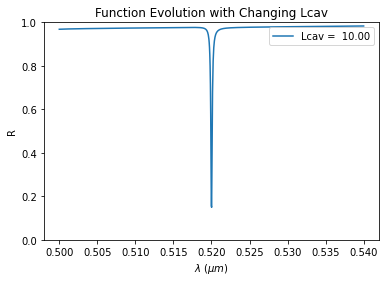

In [ ]:
# Define the variables:
pol = 1
theta = 0
N_top = 6
N_bot = 8
Lcav = np.arange(1,11,1)
lambda_cav = 0.520
delta_lambda = 0.02
Npoints = 1000

wavelengths = np.linspace(lambda_cav - delta_lambda, lambda_cav + delta_lambda, Npoints)

def f(L):
    return simulate_ref(pol,theta,lambda_cav,delta_lambda,Npoints,N_top,N_bot,L)["R"]

# Set up the figure and axis
fig,ax = plt.subplots(figsize=(6,4))
line, = ax.plot(wavelengths,f(1), label="Lcav = 1") # Initial plot with L=1
ax.set_ylim(0, 1)
ax.set_title("Function Evolution with Changing Lcav")
ax.set_xlabel(r"$\lambda$ ($\mu m$)")
ax.set_ylabel("R")
legend = ax.legend(loc="upper right")

def update(frame):
    L = Lcav[frame] # Get L
    line.set_ydata(f(L)) # Update the y-data
    legend.texts[0].set_text(f"Lcav = {L: .2f}")
    return line, legend

# Create the animation
ani = FuncAnimation(fig, update, frames=len(Lcav), blit=True)

# Save the animation as a GIF
gif_filename = "function_evolution.gif"
ani.save(gif_filename, writer=PillowWriter(fps=1))  # Set FPS for speed


### Example 6: Check that the error in the expression $L =\frac{\lambda_1\lambda_2}{2\Delta\lambda}$

Less than one peak, operation interrupted
Less than one peak, operation interrupted
Less than one peak, operation interrupted
Less than one peak, operation interrupted


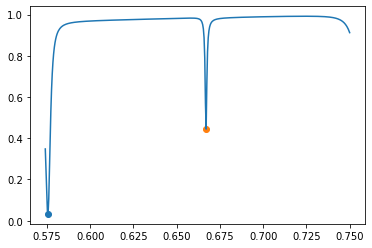

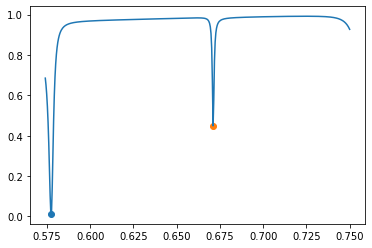

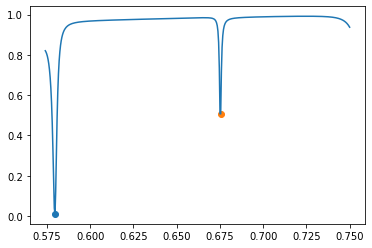

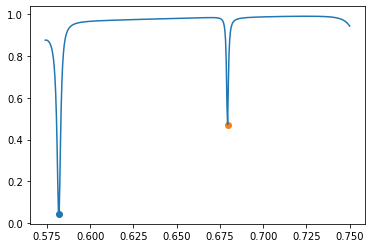

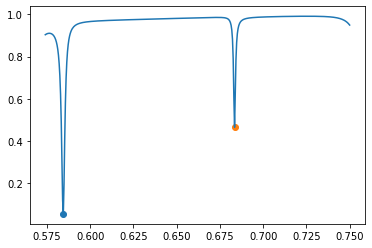

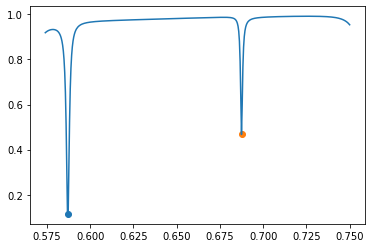

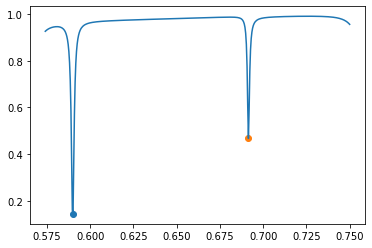

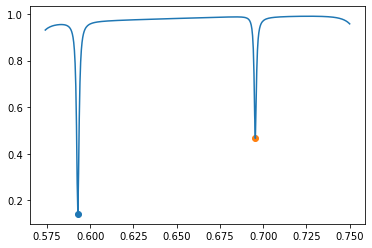

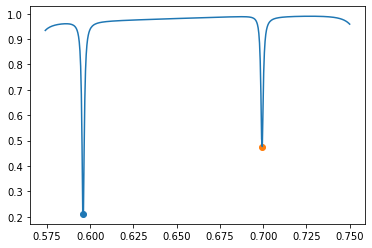

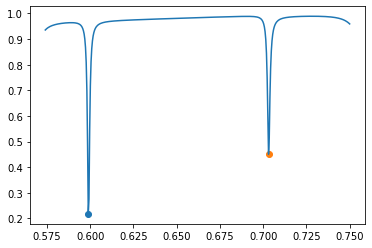

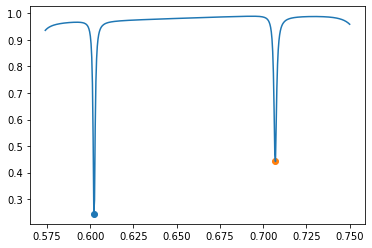

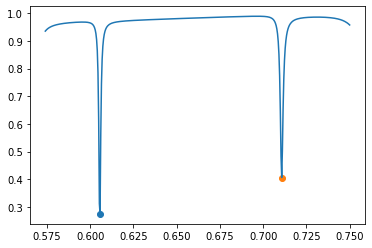

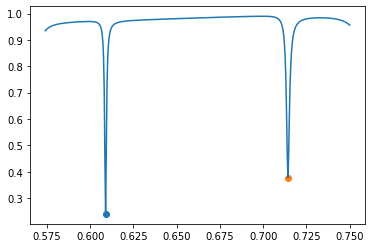

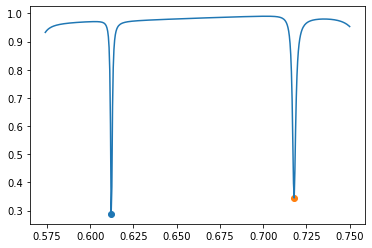

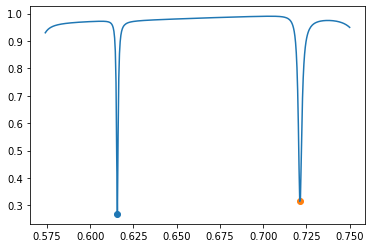

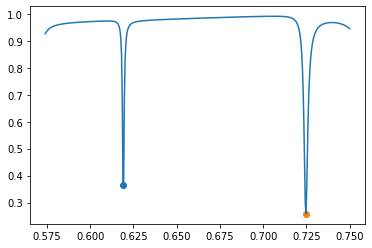

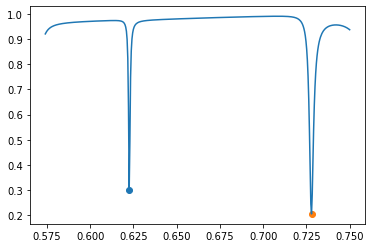

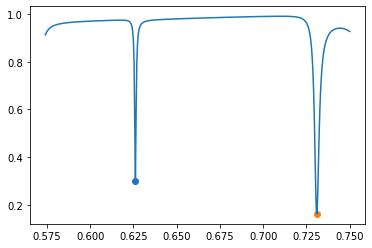

KeyboardInterrupt: 

In [ ]:
# Define the variables:
pol = 1
theta = 0
N_top = 6
N_bot = 10
Lcav_list = np.linspace(2,20,1000)
lambda_cav = 0.650
delta_lambda = 0.1
Npoints = 500
error_list=[]
L_list=[]
for Lcav in Lcav_list:
    sim = simulate_ref(pol,theta,lambda_cav,delta_lambda,Npoints,N_top,N_bot,Lcav)
    wavelengths = sim["wavelengths"][60:]
    R = sim["R"][60:]

    # Calculate L from the spectrum
    L_values = []
    # Calculate the max
    peaks, _ = find_peaks(-R, prominence=0.1)
    if len(peaks) == 1:
        print("Less than one peak, operation interrupted")
        continue
    peaks = list(peaks)

    i = round(len(peaks)/2)-1
    λ1 = wavelengths[peaks[i]]
    λ2 = wavelengths[peaks[i + 1]]
    L_N = abs(λ1 * λ2 / (2 * (λ1 - λ2)))
    # plt.figure()
    # plt.plot(wavelengths, R)
    # plt.scatter(wavelengths[peaks[i]], R[peaks[i]])
    # plt.scatter(wavelengths[peaks[i+1]], R[peaks[i+1]])
    # plt.show()

    # print(L_values)
    # print(np.mean(np.array(L_values)))
    # print(np.std(np.array(L_values)))

    error = abs(L_N - Lcav*lambda_cav)
    # print(error)
    error_list.append(error)
    L_list.append(Lcav*lambda_cav)

# Create a scatter plot with Lcav on x-axis, Energy on y-axis, and R as color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(L_list, error_list)


# Set labels and title
plt.xlabel(r'Lcav ($\lambda_c$)')
plt.ylabel('Error')
plt.title(r'$\frac{λ_1λ_2}{2\Delta\lambda}$ vs Lcav with R as Color Gradient')

plt.show()


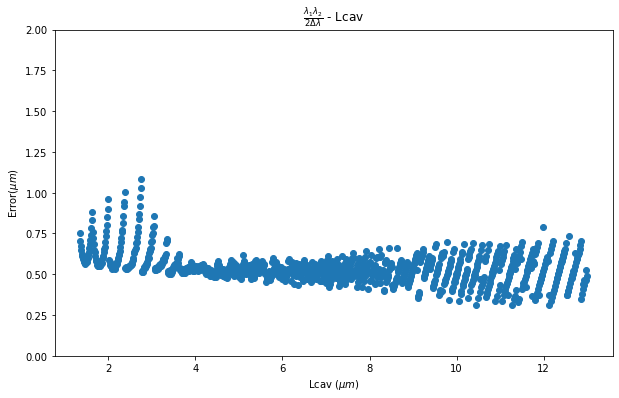

In [ ]:
# Create a scatter plot with Lcav on x-axis, Energy on y-axis, and R as color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(L_list, error_list)

#Zoom
plt.ylim(0,2)

# Set labels and title
plt.xlabel(r'Lcav ($\mu m$)')
plt.ylabel(r'Error($\mu m$)')
plt.title(r'$\frac{λ_1λ_2}{2\Delta\lambda}$ - Lcav ')

plt.show()

## Electric field in the cavity

In [ ]:
def modeProfile(pol, list_structure, theta_in, lambda0):
    """
    Calculate the mode profile using coherent transfer matrix method.

    Parameters:
    pol (int): Polarization state (1 for parallel, 0 for perpendicular).
    list_structure (np.array): Structure of materials as a 2D array.
    theta_in (float): Incident angle in radians.
    lambda0 (float): Wavelength.

    Returns:
    List: Calculated properties including depth positions, mode profile, propagation constants, electric field amplitudes, and refractive index list.
    """
    n_list = np.concatenate(([1.0], list_structure[:, 1], [1.0]))
    angle_list = snellCalculator(n_list, theta_in)
    kz_list = 2.0 * np.pi * n_list * np.cos(angle_list) / lambda0
    delta = kz_list[1:-1] * list_structure[:, 0]

    t_list = np.array([interfaceT(pol, n_list[i], n_list[i + 1], angle_list[i], angle_list[i + 1]) for i in range(len(n_list) - 1)])
    r_list = np.array([interfaceR(pol, n_list[i], n_list[i + 1], angle_list[i], angle_list[i + 1]) for i in range(len(n_list) - 1)])

    M_list = [TrM(delta[i-1], r_list[i], t_list[i]) for i in range(1, len(n_list) - 1)]
    M_product = np.linalg.multi_dot(M_list)

    M_tilde = 1.0 / t_list[0] * np.dot(np.array([[1.0, r_list[0]], [r_list[0], 1.0]]), M_product)

    # input and output electric field amplitudes
    outE = np.array([1.0 / M_tilde[0, 0], 0.0])
    inE = np.array([1.0, M_tilde[1, 0] / M_tilde[0, 0]])

    # depth tab --> gives z position for the interfaces
    depth_tab = np.insert(np.cumsum(list_structure[:, 0]), 0, 0)

    # calculate the electric field amplitudes at each interface
    vecE_list = [inE] + [[0.0, 0.0] for _ in range(1, len(n_list) - 1)] + [outE]

    for i in range(1, len(vecE_list) - 1):
        vecE_list[-i-1] = np.dot(M_list[-i], vecE_list[-i])
    vecE_list = np.array(vecE_list)
    # print("vex:", vecE_list[:,0])
    # print("vex:", vecE_list[:,1])


    mode_prof = np.abs(vecE_list[:, 0] + vecE_list[:, 1])**2

    return [depth_tab, mode_prof, kz_list, inE, outE, vecE_list, n_list]

In [ ]:
lambda_cav = 0.65
N_top = 6
N_bot = 10
Lcav = 7*lambda_cav





profile_structure = np.array(profilerTiO2SiO2BM(lambda_cav, lambda_cav, N_top, 16) +
                             profilerCavSpacer(lambda_cav, lambda_cav, Lcav, 16) +
                             profilerSiO2TiO2BM(lambda_cav, lambda_cav, N_top, 16)
                             )

depth_tab = np.insert(np.cumsum(profile_structure[:, 0]), 0, 0)

n_struct = []
for i in range(len(profile_structure)):
    n_real = profile_structure[i, 1].real
    n_struct.append([depth_tab[i], n_real])



# Extract depth and refractive index values
depth = [point[0] for point in n_struct]
refractive_index = [point[1] for point in n_struct]


simModProf = modeProfile(1, profile_structure, 0, lambda_cav)

transformed_profile = simModProf[1][1:] / 50 + 1  # Assuming 2 ;; -1 means taking from the second element to the end

maxval = np.max(transformed_profile)

plt.scatter(simModProf[0], simModProf[1][1:]/maxval/25)


NameError: name 'profilerTiO2SiO2BM' is not defined